Проанализировать производительность жестких дисков (HDD/SSD), их характеристики между ними

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [36]:
#1 Чтение данных
data_path = r'C:\Users\chist\OneDrive\Desktop\test\SSD_HDD_benchmarks_v9.csv'
data = pd.read_csv(data_path)

# Вывод первых строк
print(data.head())
print(data.info())
print(data.describe())

                                driveName type  ...  testDate  samples
0                 NVMe WDS500G1X0E-00AFY0  SSD  ...      2022        5
1      Seagate FireCuda 530 ZP4000GM30023  SSD  ...      2021       13
2                  KINGSTON SKC3000S1024G  SSD  ...      2021       42
3  NVMe Samsung 980 PRO with Heatsink 2TB  SSD  ...      2021        8
4                     KINGSTON SFYRD2000G  SSD  ...      2021       33

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   driveName     8927 non-null   object 
 1   type          8927 non-null   object 
 2   diskCapacity  8927 non-null   float64
 3   diskMark      8927 non-null   int64  
 4   rank          8927 non-null   int64  
 5   price         2079 non-null   float64
 6   driveValue    2079 non-null   float64
 7   priceperGB    2079 non-null   float64
 8   testDate 

   diskCapacity  diskMark  rank  ...  priceperGB  testDate  samples
0         465.8     52280     1  ...         NaN      2022        5
1        3600.0     52066     2  ...         NaN      2021       13
2         953.9     49829     3  ...         NaN      2021       42
3        1800.0     49517     4  ...         NaN      2021        8
4        1800.0     48995     5  ...         NaN      2021       33

[5 rows x 8 columns]


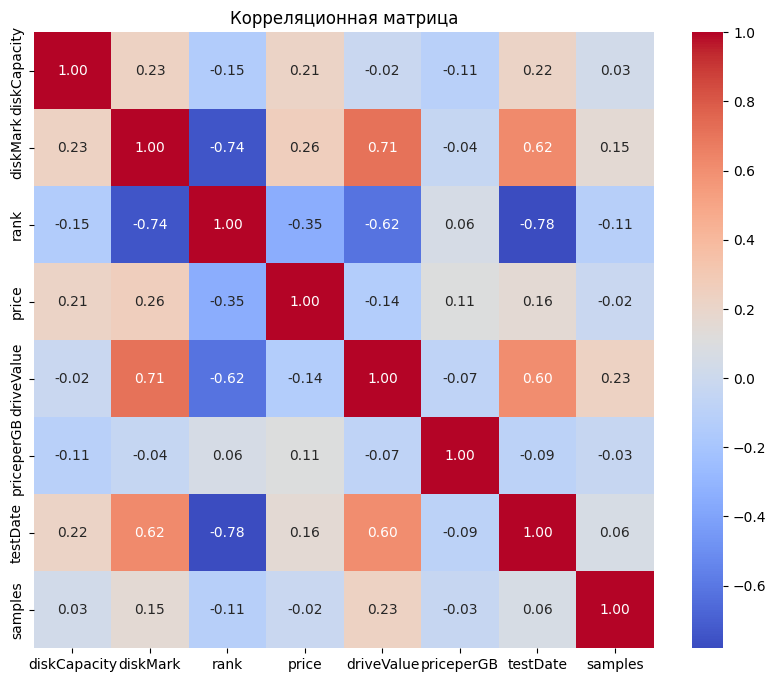

Гистограммы распределения для каждого числового признака:


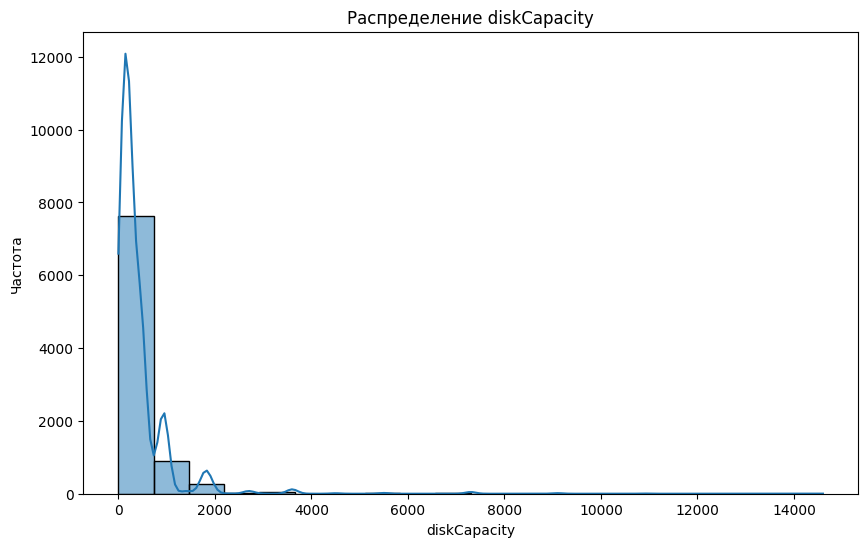

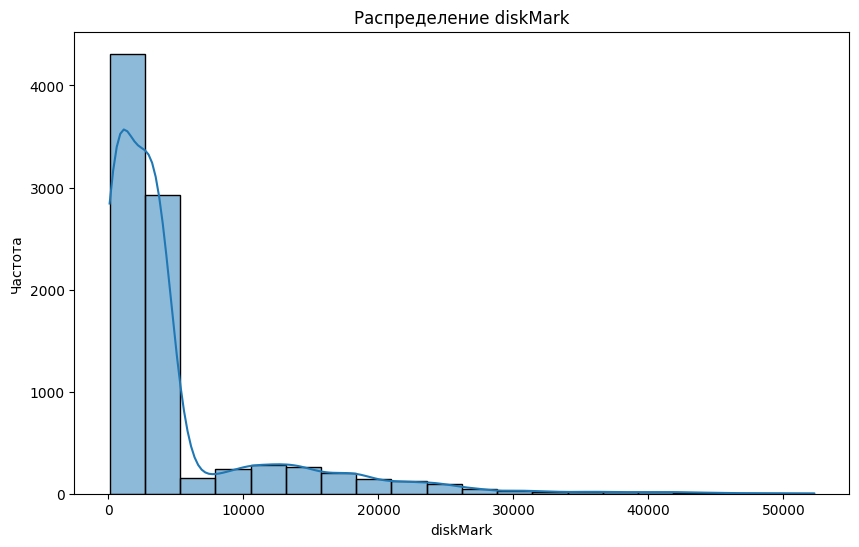

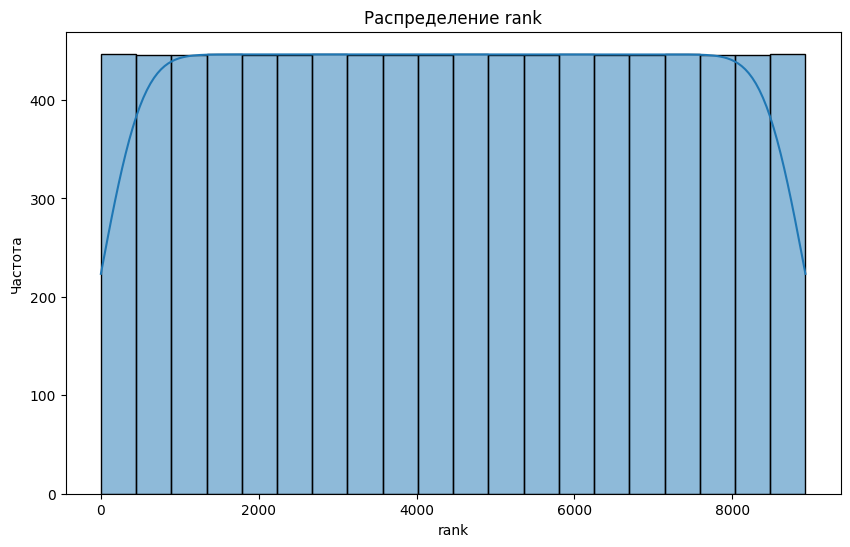

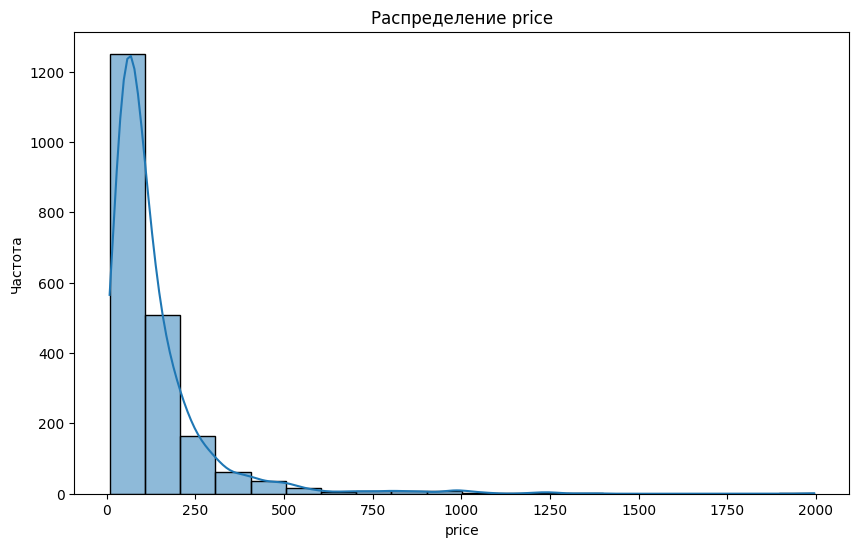

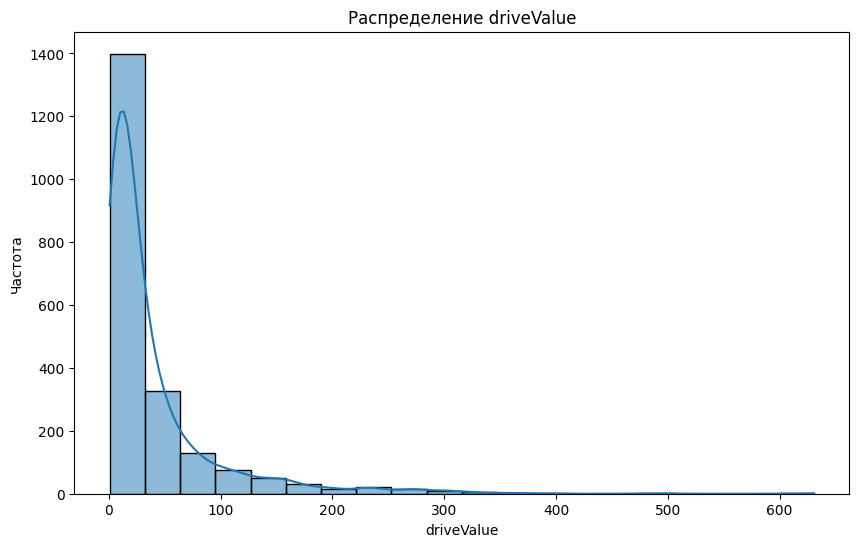

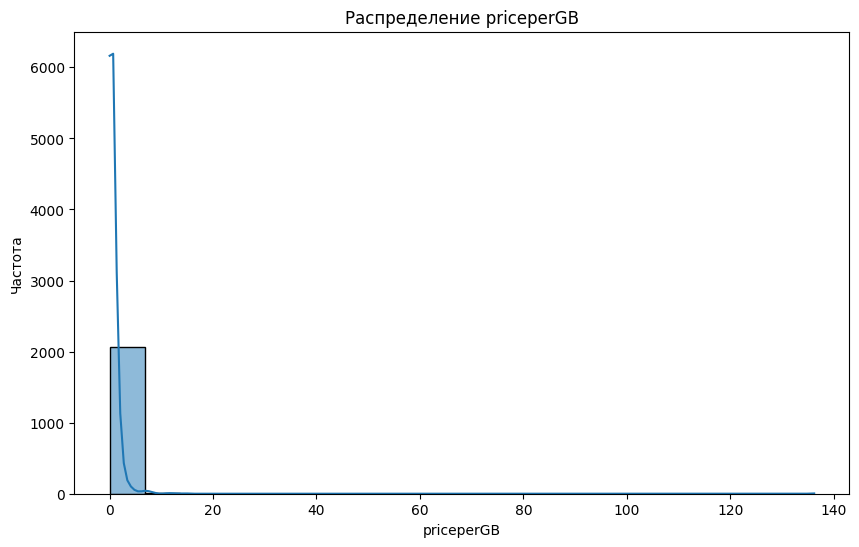

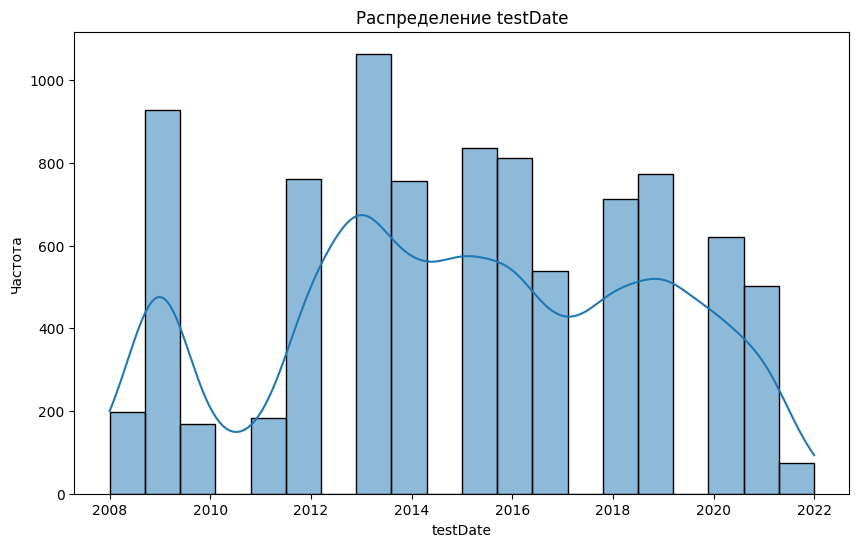

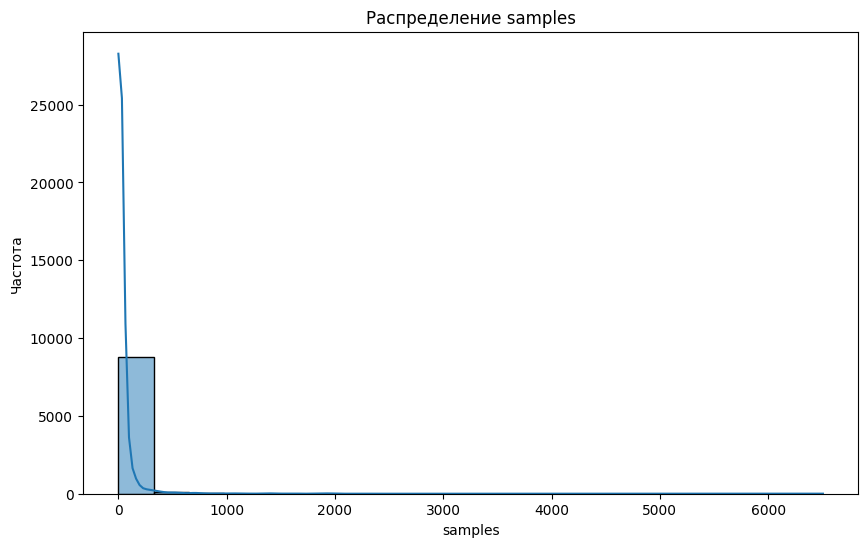

Основные статистики для числовых данных:
       diskCapacity      diskMark  ...     testDate      samples
count   8927.000000   8927.000000  ...  8927.000000  8927.000000
mean     415.903279   4800.680968  ...  2015.008626    43.334379
std      683.292670   6794.141177  ...     3.682783   196.923990
min        0.572600     89.000000  ...  2008.000000     1.000000
25%      119.200000    723.000000  ...  2012.000000     6.000000
50%      238.500000   2810.000000  ...  2015.000000    11.000000
75%      476.900000   4182.000000  ...  2018.000000    27.000000
max    14600.000000  52280.000000  ...  2022.000000  6505.000000

[8 rows x 8 columns]


In [37]:
#2 Убираем нечисловые столбцы
numeric_data = data.select_dtypes(include=[np.number])

# Проверяем, что в данных остались только числовые столбцы
print(numeric_data.head())

# Корреляционная матрица
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


# Гистограммы для каждого числового признака
print("Гистограммы распределения для каждого числового признака:")
for column in numeric_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_data[column].dropna(), bins=20, kde=True)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

# Статистики для всех числовых столбцов
print("Основные статистики для числовых данных:")
print(numeric_data.describe())



In [38]:
#3 Проверка пропущенных значений
print(data.isnull().sum())

# Удаление столбцов с большим количеством пропусков
data_cleaned = data.drop(columns=['price', 'driveValue', 'priceperGB'])

# Проверка оставшихся пропусков
print(data_cleaned.isnull().sum())


driveName          0
type               0
diskCapacity       0
diskMark           0
rank               0
price           6848
driveValue      6848
priceperGB      6848
testDate           0
samples            0
dtype: int64
driveName       0
type            0
diskCapacity    0
diskMark        0
rank            0
testDate        0
samples         0
dtype: int64


In [39]:
#4 Обработать категориальные признаки
# Категориальные признаки: type, driveName
data_cleaned['type'] = data_cleaned['type'].map({'SSD': 0, 'HDD': 1})

# Удаление столбца 'driveName' (так как названия уникальны)
data_final = data_cleaned.drop(columns=['driveName'])


In [40]:
#5 Нормализация числовых признаков
scaler = StandardScaler()
numerical_columns = ['diskCapacity', 'diskMark', 'rank', 'samples']
data_final[numerical_columns] = scaler.fit_transform(data_final[numerical_columns])

print(data_final.head())


   type  diskCapacity  diskMark      rank  testDate   samples
0     0      0.073028  6.988665 -1.731857      2022 -0.194677
1     0      4.660192  6.957166 -1.731469      2021 -0.154050
2     0      0.787403  6.627893 -1.731081      2021 -0.006776
3     0      2.025741  6.581969 -1.730693      2021 -0.179442
4     0      2.025741  6.505133 -1.730305      2021 -0.052482


In [41]:
#6 Разбить данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X = data_final.drop(columns=['type'])
y = data_final['type']

# Разделим данные на обучающую и тестовую выборки (80% для обучения, 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")



Размер обучающей выборки: (7141, 5)
Размер тестовой выборки: (1786, 5)


In [42]:
#Мы будем использовать KNN, так как задача классификации, где нужно определить тип устройства (HDD или SSD), подходит для этого алгоритма
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# 7. Запустим классификатор K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающих данных
knn.fit(X_train, y_train)

# Прогнозируем на тестовой выборке
y_pred = knn.predict(X_test)

# Оценим точность модели на тестовых данных
f1  = f1_score(y_test, y_pred, average='weighted')
print(f"Точность модели с KNN: {f1:.4f}")

Точность модели с KNN: 0.9770


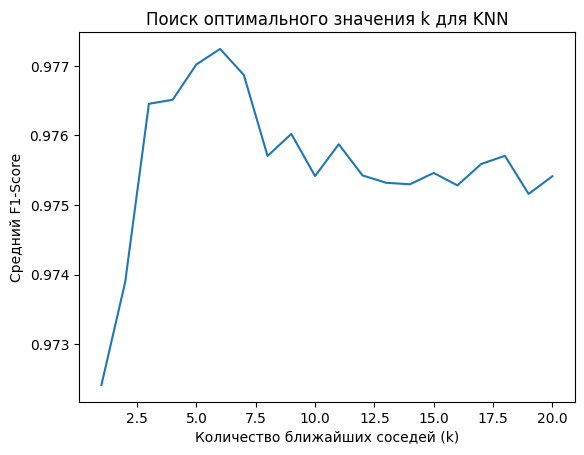

Оптимальное количество ближайших соседей: 6


In [43]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Список возможных значений для k
k_range = range(1, 21) 
f1_scores = []

# Пробуем разные значения k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Оценка точности с использованием кросс-валидации
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_weighted')
    f1_scores.append(cv_scores.mean())

# Визуализация результатов
plt.plot(k_range, f1_scores)
plt.xlabel('Количество ближайших соседей (k)')
plt.ylabel('Средний F1-Score')
plt.title('Поиск оптимального значения k для KNN')
plt.show()

# Определяем оптимальное значение k
optimal_k = k_range[f1_scores.index(max(f1_scores))]
print(f"Оптимальное количество ближайших соседей: {optimal_k}")


In [44]:
#9. Вычислить ошибки на обучающей и тестовой выборках.
from sklearn.metrics import f1_score

# Обучение модели на обучающих данных
knn.fit(X_train, y_train)

# Прогнозы на обучающих и тестовых данных
y_pred_train = knn.predict(X_train)  # Прогнозируем на обучающих данных
y_pred_test = knn.predict(X_test)    # Прогнозируем на тестовых данных

train_f1 = f1_score(y_train, y_pred_train, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Вычисление ошибок 
train_error = 1 - train_f1
test_error = 1 - test_f1

print(f"F1-Score на обучающей выборке: {train_f1:.4f}")
print(f"F1-Score на тестовой выборке: {test_f1:.4f}")
print(f"Ошибка на обучающей выборке: {train_error:.4f}")
print(f"Ошибка на тестовой выборке: {test_error:.4f}")



F1-Score на обучающей выборке: 0.9774
F1-Score на тестовой выборке: 0.9741
Ошибка на обучающей выборке: 0.0226
Ошибка на тестовой выборке: 0.0259


In [45]:
#10 Запустить другие классификаторы
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Прогнозируем на тестовых данных
y_pred_log_reg = log_reg.predict(X_test)

# Оценим точность
f1_log_reg  = f1_score(y_test, y_pred_log_reg,  average='weighted')
print(f"Точность модели Логистической регрессии: {f1_log_reg :.4f}")


Точность модели Логистической регрессии: 0.9748


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Прогнозируем на тестовых данных
y_pred_rf = rf.predict(X_test)

# Оценим точность
f1_rf  = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Точность модели Random Forest: {f1_rf:.4f}")


Точность модели Random Forest: 0.9809


In [47]:
from sklearn.svm import SVC

# SVM (Support Vector Machine)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Прогнозируем на тестовых данных
y_pred_svm = svm.predict(X_test)

# Оценим точность
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"Точность модели SVM: {f1_svm:.4f}")

Точность модели SVM: 0.9708


In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Прогнозируем на тестовых данных
y_pred_gb = gb.predict(X_test)

# Оценим точность
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
print(f"Точность модели Gradient Boosting: {f1_gb:.4f}")


Точность модели Gradient Boosting: 0.9792


In [49]:
# Сравниваем точности
print(f"Точность KNN: {f1:.4f}")
print(f"Точность Логистической регрессии: {f1_log_reg:.4f}")
print(f"Точность Random Forest: {f1_rf:.4f}")
print(f"Точность SVM: {f1_svm:.4f}")
print(f"Точность Gradient Boosting: {f1_gb:.4f}")


Точность KNN: 0.9770
Точность Логистической регрессии: 0.9748
Точность Random Forest: 0.9809
Точность SVM: 0.9708
Точность Gradient Boosting: 0.9792


In [50]:
#11 побороться с несбалансированностью классов (если она есть)
print(y_train.value_counts())
# классы несбалансированны

type
0    5050
1    2091
Name: count, dtype: int64


In [51]:
from imblearn.over_sampling import RandomOverSampler

# Создание объекта RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Применение oversampling к обучающему набору данных
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Проверка баланса после ресэмплинга
print(pd.Series(y_resampled).value_counts())


type
0    5050
1    5050
Name: count, dtype: int64


In [52]:
#12 исключить коррелированные переменные
corr_matrix = X_train.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.7)]

# Удаляем коррелированные переменные из обучающей и тестовой выборок
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

# Проверка после удаления
print(f"Удаленные признаки: {to_drop}")
print(f"Количество признаков после удаления: {X_train.shape[1]}")


Удаленные признаки: ['rank', 'testDate']
Количество признаков после удаления: 3


Вывод
Данные, использованные для классификации типа устройства (HDD или SSD), содержат различные признаки, которые могут быть полезными для предсказания класса. Прежде чем обучать модель, необходимо провести несколько этапов предобработки данных, таких как заполнение пропущенных значений, стандартизация признаков и кодирование категориальных переменных. Предобработка данных, включая заполнение пропусков, нормализацию и кодирование, а также борьба с несбалансированностью классов с помощью RandomOverSampler, улучшили качество модели. Классификатор KNN показал точность 97.7%, а случайный лес — 98.1%. Исключение коррелированных признаков помогло избежать мультиколлинеарности и повысить интерпретируемость модели. В целом, эти шаги улучшили производительность и стабильность модели.